In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

In [76]:
df = pd.read_csv('.../diabetes_binary_health_indicators.csv')

print(df.shape)
print(df.head(10))
print(df.tail(10))

(253680, 22)
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6              0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0

In [77]:
'''remove age umder 3'''
df = df[df['Age'] > 3.0].reset_index()

In [78]:
df.isnull().sum()
#There are no null values

index                   0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [79]:
df.corr()

,index,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
index,1.000000,0.005625,0.003305,-0.001861,-0.003202,0.003573,-0.012511,-0.002331,0.005598,-0.013113,...,0.000452,0.006289,0.016496,0.004698,0.005927,0.008646,0.003254,-0.014659,-0.029656,-0.031708
Diabetes_binary,0.005625,1.000000,0.252234,0.186335,0.064913,0.224582,0.053982,0.101013,0.170056,-0.115539,...,0.008436,0.038484,0.293468,0.076148,0.166817,0.210339,0.037494,0.140881,-0.125690,-0.173998
HighBP,0.003305,0.252234,1.000000,0.273735,0.100819,0.214305,0.083294,0.122658,0.198563,-0.119375,...,0.026246,0.025248,0.294604,0.062785,0.151775,0.209592,0.054554,0.292016,-0.143477,-0.188055
HighChol,-0.001861,0.186335,0.273735,1.000000,0.087360,0.102539,0.080876,0.084954,0.170383,-0.068608,...,0.030483,0.023013,0.198182,0.070871,0.112112,0.128143,0.037484,0.203495,-0.070144,-0.096572
CholCheck,-0.003202,0.064913,0.100819,0.087360,1.000000,0.037004,-0.009814,0.024705,0.044039,0.005837,...,0.119208,-0.058321,0.046674,-0.006097,0.030661,0.039246,-0.018309,0.090876,0.001684,0.012803
BMI,0.003573,0.224582,0.214305,0.102539,0.037004,1.000000,0.003736,0.018687,0.052702,-0.152426,...,-0.021159,0.060316,0.236590,0.086927,0.122921,0.203321,0.047873,-0.086537,-0.103567,-0.101911
Smoker,-0.012511,0.053982,0.083294,0.080876,-0.009814,0.003736,1.000000,0.058770,0.111303,-0.084476,...,-0.026275,0.048125,0.156880,0.091487,0.111966,0.116432,0.099352,0.089147,-0.156999,-0.129392
Stroke,-0.002331,0.101013,0.122658,0.084954,0.024705,0.018687,0.058770,1.000000,0.198513,-0.067747,...,0.004995,0.039577,0.178721,0.074556,0.147330,0.172949,0.005389,0.117297,-0.076992,-0.135826
HeartDiseaseorAttack,0.005598,0.170056,0.198563,0.170383,0.044039,0.052702,0.111303,0.198513,1.000000,-0.084429,...,0.012988,0.037387,0.259918,0.070065,0.178823,0.205924,0.093993,0.209734,-0.100525,-0.149428
PhysActivity,-0.013113,-0.115539,-0.119375,-0.068608,0.005837,-0.152426,-0.084476,-0.067747,-0.084429,1.000000,...,0.040031,-0.067439,-0.269535,-0.134217,-0.221681,-0.255393,0.030771,-0.068869,0.203618,0.207126


Text(0.5, 1.0, 'Features correlation')

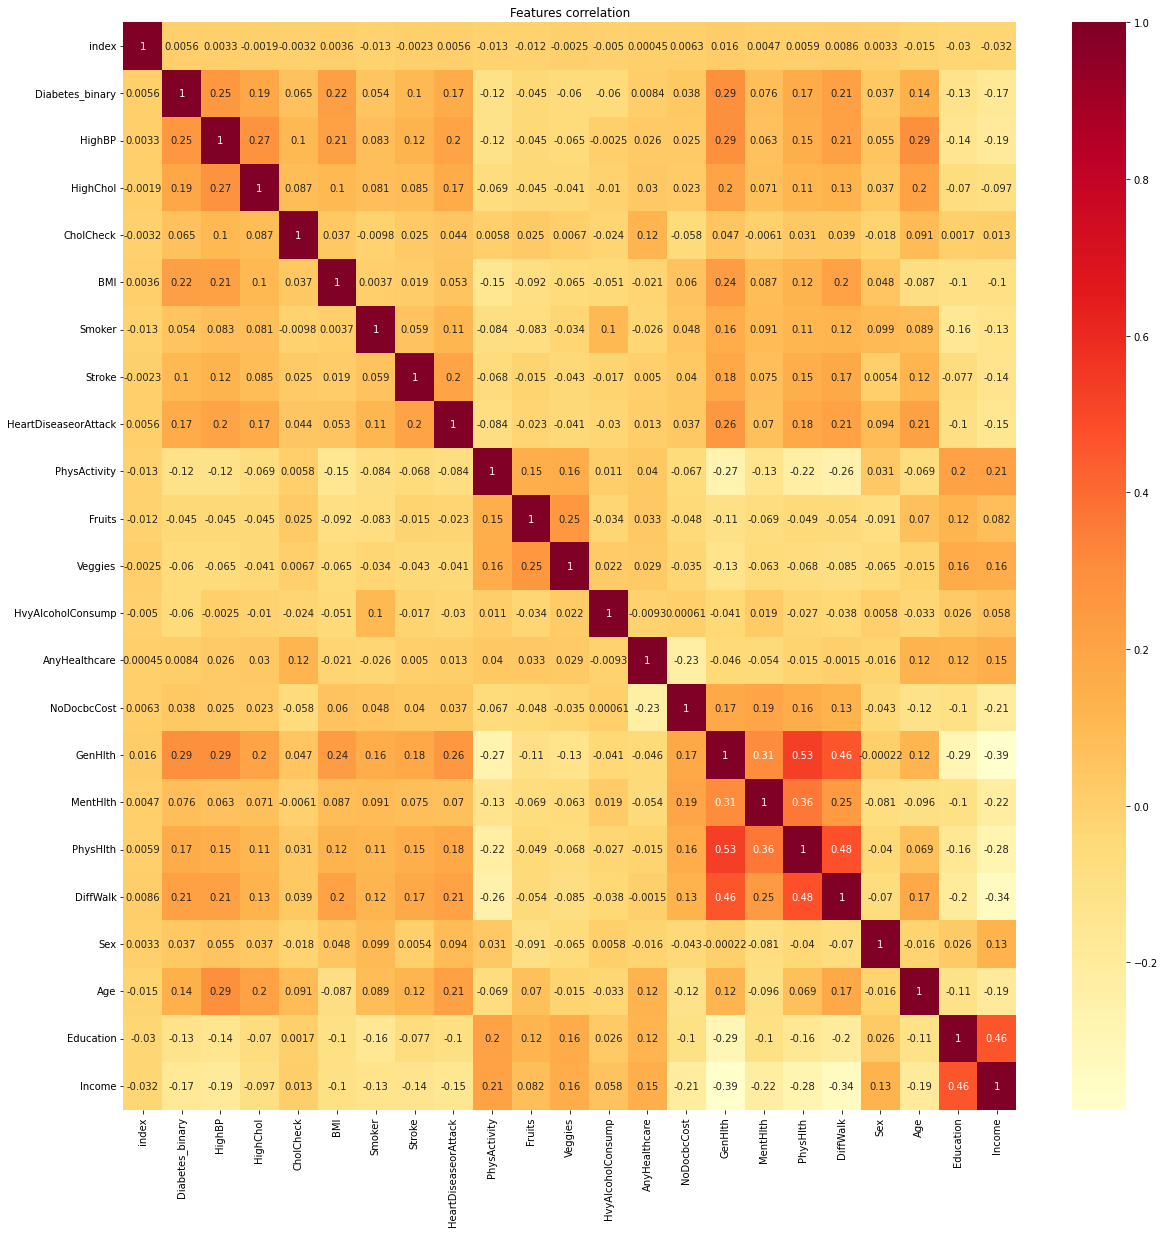

In [80]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')
plt.title("Features correlation")

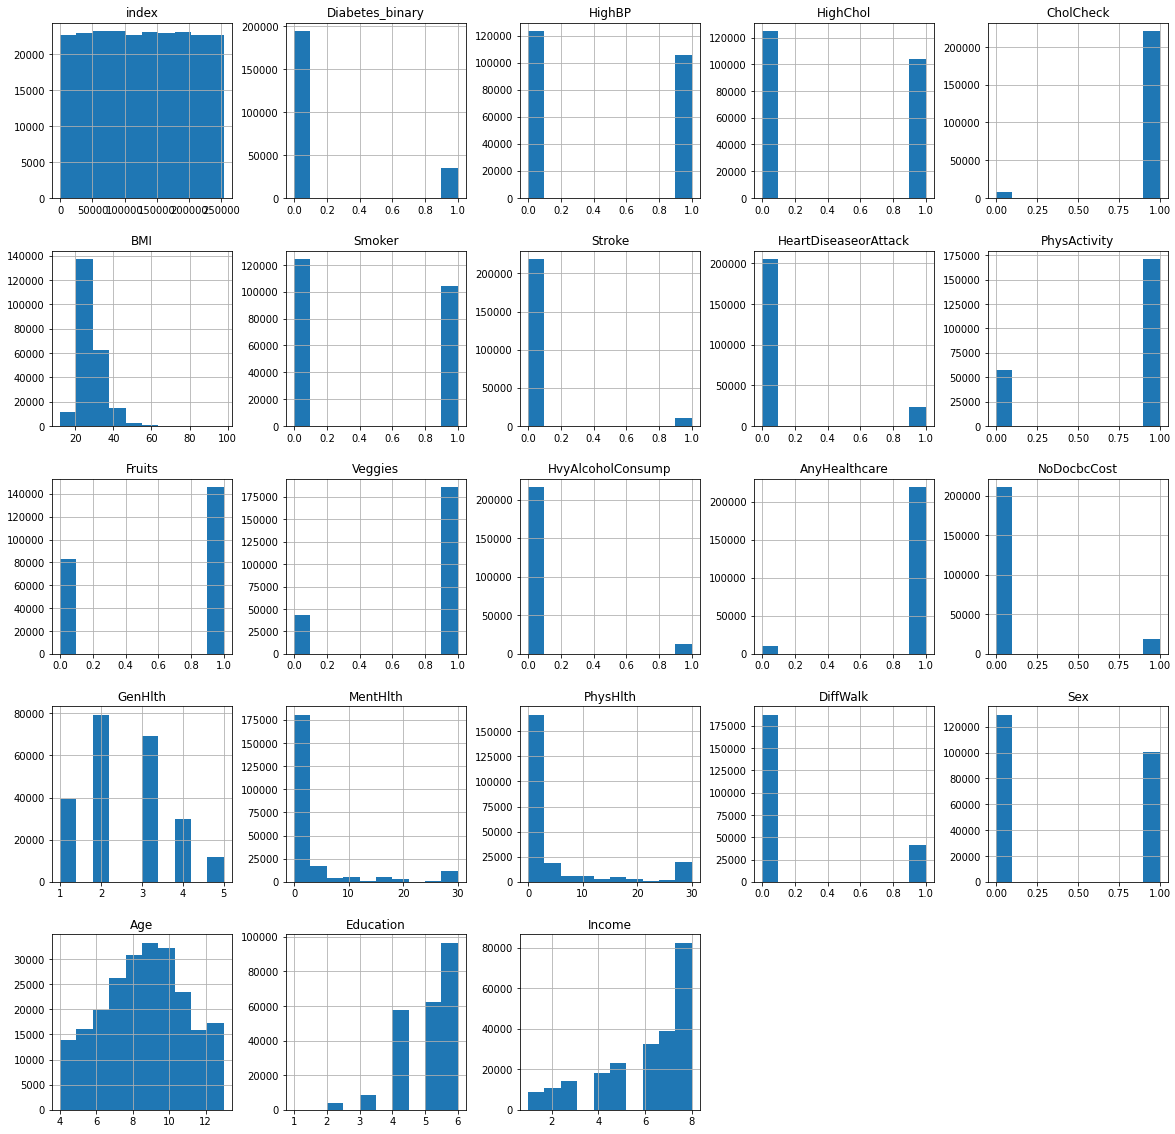

In [81]:
df.hist(figsize=(20,20))
plt.show()

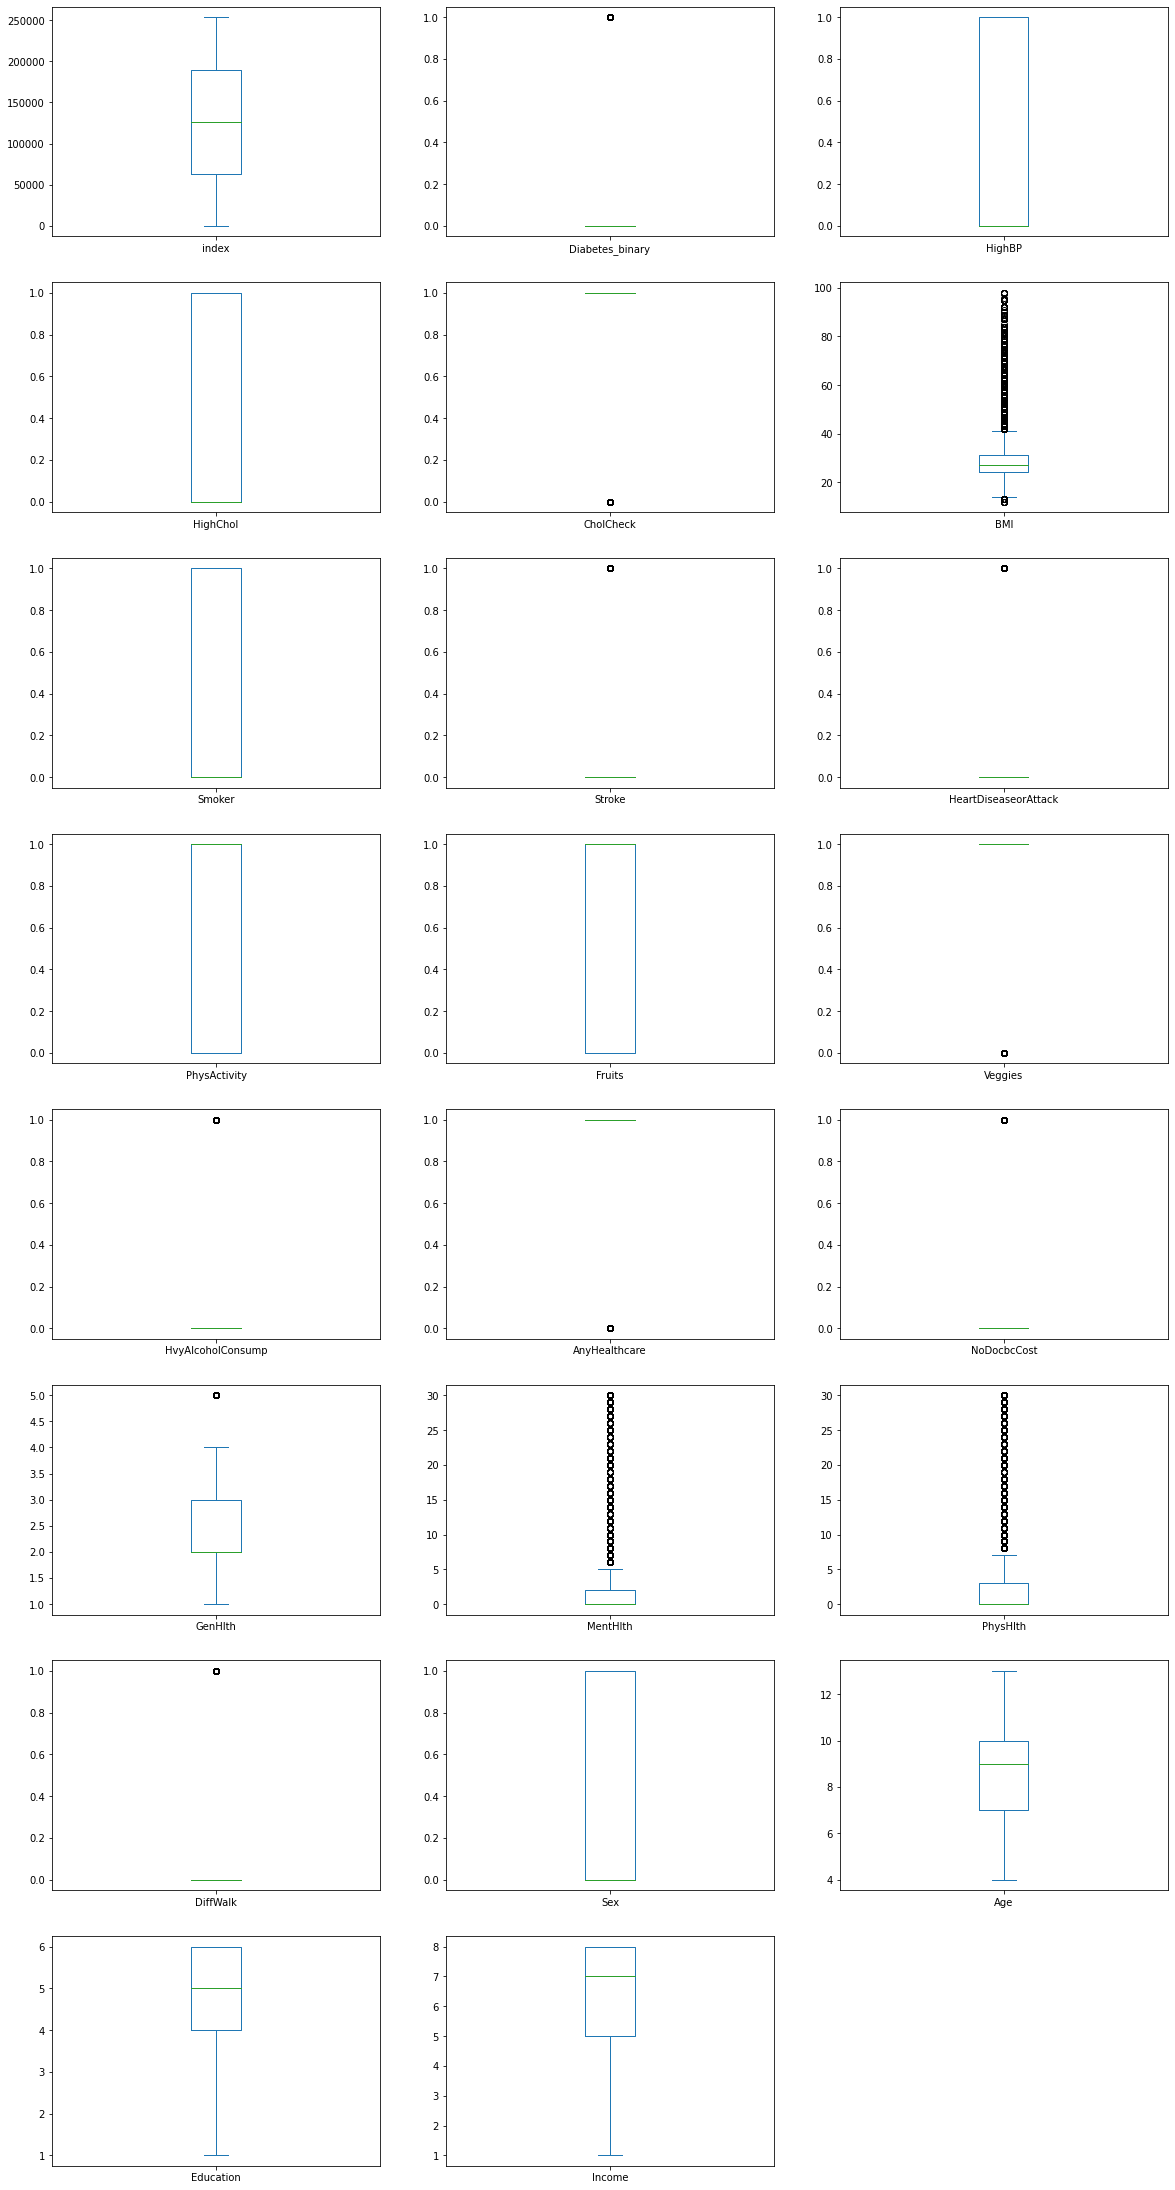

In [82]:
df.plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, figsize=(20, 60))
plt.show()

Check for ouliers 


In [83]:
print(df.describe())
'''Most of the features are binary so we don't have to worry about outliers'''

               index  Diabetes_binary         HighBP       HighChol  \
count  229259.000000    229259.000000  229259.000000  229259.000000   
mean   126652.580221         0.151854       0.461574       0.454979   
std     73033.748104         0.358881       0.498522       0.497970   
min         0.000000         0.000000       0.000000       0.000000   
25%     63598.500000         0.000000       0.000000       0.000000   
50%    126691.000000         0.000000       0.000000       0.000000   
75%    189787.500000         0.000000       1.000000       1.000000   
max    253679.000000         1.000000       1.000000       1.000000   

           CholCheck            BMI         Smoker         Stroke  \
count  229259.000000  229259.000000  229259.000000  229259.000000   
mean        0.965327      28.462739       0.456532       0.044312   
std         0.182950       6.512973       0.498108       0.205789   
min         0.000000      12.000000       0.000000       0.000000   
25%         1.0

"Most of the features are binary so we don't have to worry about outliers"

Seperate the features from the target for training


In [84]:
X = df.drop(['Diabetes_binary'],axis=1)
y = df['Diabetes_binary']

In [85]:
print(y.value_counts()/float(len(df)))
#the class seem to be unbalance as there are more 0 label than 1 

0.0    0.848146
1.0    0.151854
Name: Diabetes_binary, dtype: float64


Split the data 


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =264)

Train, test and Evaluate with LogisticRegression and RF


In [87]:
algo = [LogisticRegression(),
        RandomForestClassifier(max_depth=5,n_estimators=100,max_features='auto')]

roc_list = []


for names in algo:
    model =names
    %time model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    roc_list.append(score)

    print(f'Model: {model} -- Score: {score}')
    print('ACCURACY', accuracy_score(y_train,model.predict(X_train)))
    print('----------------------------------------------------------------')


CPU times: total: 344 ms
Wall time: 659 ms
Model: LogisticRegression() -- Score: 0.3806331087556383
ACCURACY 0.8478247831325958
----------------------------------------------------------------
CPU times: total: 9.5 s
Wall time: 9.76 s
Model: RandomForestClassifier(max_depth=5) -- Score: 0.8022541899613366
ACCURACY 0.8485935651311018
----------------------------------------------------------------


In [88]:
names = ['Logistic_Regression', 'RandomForest']
evaluation = pd.DataFrame({'Model':names, 'Score':roc_list})
evaluation=evaluation.sort_values(by='Score', ascending=False)
print(evaluation)

                 Model     Score
1         RandomForest  0.802254
0  Logistic_Regression  0.380633
